In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import random
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import os
import matplotlib.pyplot as plt




USER-AGENT

In [7]:

user_agents = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 "
    "(KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) "
    "AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0 Safari/605.1.15",
    "Mozilla/5.0 (X11; Linux x86_64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"
]

header = {"User-Agent": random.choice(user_agents)}
#Manual_Products
product={
    'Ambush Marpat Navy Digital Camo Rucksack': 'https://www.flipkart.com/f-gear-ambush-marpat-navy-digital-camo-rucksack-32-l/p/itmfbvnamyfzknqb?pid=RKSFBV7ZFEQG4CBG&lid=LSTRKSFBV7ZFEQG4CBGUUI8KY&marketplace=FLIPKART&q=miltary+bags&store=reh%2F4d7&srno=s_1_38&otracker=search&otracker1=search&fm=Search&iid=8da3a441-2261-4857-8b12-a33f21ed2978.RKSFBV7ZFEQG4CBG.SEARCH&ppt=sp&ppn=sp&ssid=rixtsbkjwg0000001758375629095&qH=a23a9b390859fae6',
    'Sonata UNVEIL 3.0 Men Analog Watch' : 'https://www.flipkart.com/sonata-unveil-3-0-men-analog-watch/p/itmbf88cf43c7309?pid=WATGWC8GHDPFBN4T&lid=LSTWATGWC8GHDPFBN4TUO2GWO&marketplace=FLIPKART&q=wtach&store=search.flipkart.com&srno=s_1_37&otracker=search&otracker1=search&fm=Search&iid=en_CGZ1XLTaLuEeqoRwbM55zYXBrSRGDDavbiKqJKXura4DNFNLmE1V6XkkhAKcdcUpFnMiTk9evFal2Kdzi8ZB0E2UavVitYDrd-FBuTGnX04%3D&ppt=sp&ppn=sp&ssid=9rpjrbmc8g0000001758376537811&qH=d1ae4591b8cea190',
    'Hustle V2 IDP Sneakers For Men' : 'https://www.flipkart.com/puma-hustle-v2-idp-sneakers-men/p/itmf507cb77e0eda?pid=SHOG5HF2M39DGFP3&lid=LSTSHOG5HF2M39DGFP3Y1DUJZ&marketplace=FLIPKART&store=osp%2Fcil&srno=b_1_1&otracker=browse&fm=organic&iid=en_W-VG-TJDUweKP2UBHFVodtfwbI8uoO4k1XiH_7tFjSN8sY1oPKg3J0HoDAnYUJm4k05kB3es0uKHiYxMkuXMRg%3D%3D&ppt=browse&ppn=browse&ssid=x4ndnv5bow0000001758376686364',
    'Samsung Galaxy S25 5G' : 'https://www.flipkart.com/samsung-galaxy-s25-5g-silver-shadow-256-gb/p/itm70d1f331ebbac?pid=MOBH8K8UH9XHPVGQ&lid=LSTMOBH8K8UH9XHPVGQEUE4JY&marketplace=FLIPKART&store=tyy%2F4io&srno=b_1_1&otracker=browse&fm=organic&iid=7d33f5c4-46f7-4056-bb18-19c02c12e234.MOBH8K8UH9XHPVGQ.SEARCH&ppt=None&ppn=None&ssid=vj3c89yw9s0000001758435581644',
    'ASUS Vivobook S14 Flip': 'https://www.flipkart.com/asus-vivobook-s14-flip-2025-office-2024-m365-basic-backlit-keyboard-intel-core-i5-13th-gen-13420h-16-gb-512-gb-ssd-windows-11-home-tp3402vao-lz612ws-2-1-laptop/p/itme494b3629a714?pid=COMH9SJ9VAJ7ZD99&lid=LSTCOMH9SJ9VAJ7ZD99ZNVNMB&marketplace=FLIPKART&store=tyy%2Fhry&srno=b_1_1&otracker=browse&fm=organic&iid=en_HwIqVwWU22ZNq6PDCgprW7KoYnSyHmWRZjE97z4wJNBqmDlAO2vOtwqKeIS5fqKmEoJR44QVv9vVyeXyw08rgPUFjCTyOHoHZs-Z5_PS_w0%3D&ppt=None&ppn=None&ssid=as33ayfskw0000001758435743533',
    'CrossBeats Hawk Gaming TWS' : 'https://www.flipkart.com/crossbeats-hawk-gaming-tws-type-c-dongle-bt-v5-4-10ms-latency-rgb-lights-6-ai-enc-mics-bluetooth/p/itm3bcf4d4774568?pid=ACCH8GU72Z77CWJM&lid=LSTACCH8GU72Z77CWJMZKSSL1&marketplace=FLIPKART&store=0pm%2Ffcn%2F821%2Fa7x%2F2si&srno=b_1_37&otracker=browse&fm=organic&iid=a2350711-224c-4ac2-a045-bd2949bce236.ACCH8GU72Z77CWJM.SEARCH&ppt=browse&ppn=browse&ssid=4wsxz06k5s0000001758435882318',
    'ADIDAS Men Striped Black Track Pants' : 'https://www.flipkart.com/adidas-striped-men-black-track-pants/p/itm91d796eec5e8c?pid=TKPHB83AHWGRYJYW&lid=LSTTKPHB83AHWGRYJYWD9BX1T&marketplace=FLIPKART&store=clo%2Fvua%2Fjlk%2F6ql&srno=b_1_17&otracker=hp_rich_navigation_4_1.navigationCard.RICH_NAVIGATION_Fashion~Men%27s%2BBottom%2BWear~Men%27s%2BTrackpants_Q8Y41RZL0HE5&otracker1=hp_rich_navigation_PINNED_neo%2Fmerchandising_NA_NAV_EXPANDABLE_navigationCard_cc_4_L2_view-all&fm=organic&iid=e6b1a0f0-27bc-40cb-b389-d4c3a072565f.TKPHB83AHWGRYJYW.SEARCH&ppt=browse&ppn=browse'
}


In [ ]:

def scrape_manual_products():
    data = []
    for name, url in product.items():
        response = requests.get(url, headers=header)
        soup = BeautifulSoup(response.content, "html.parser")
        
        product_tag = soup.find("span", {"class": "VU-ZEz"})
        price_tag = soup.find("div", {"class": "Nx9bqj CxhGGd"})
        if not product_tag or not price_tag:
            print(f"Could not fetch data for {name}")
            continue

        product_name= product_tag.get_text(strip = True)
        price= price_tag.get_text().replace("₹", "").replace(",", "").strip()


        data.append([datetime.now(), product_name,url, int(price)])
    return data
        
    #     data.append([datetime.now(), product_name, url, price])
    # return data

In [ ]:
#Scrape cart products 

def  scrape_cart_products():
    options = webdriver.ChromeOptions()
    options.add_argument("--start-maximized")
    driver = webdriver.chrome(options = options)

    driver.get("")

    print("Please login manually within 40 seconds...")
    time.sleep(40)

    driver.get("")
    time.sleep(5)

    products= driver.find_elements(By.CLASS_NAME, "")
    prices = driver.find_elements(By.CLASS_NAME,"")
    links = driver.find_elements(By.CSS_SELECTOR, "")

    
    data = []
    for p, pr, l in zip(products, prices, links):
        name = p.text.strip()
        price = pr.text.replace("₹", "").replace(",", "").strip()
        url = l.get_attribute("href") 
        data.append([datetime.now(), name, url, int(price)])
    
    driver.quit()
    return data
    
    



In [10]:
def save_data(filename, data):
    df = pd.DataFrame(data, columns=["time", "product", "url", "price"])
    if os.path.exists(filename):
        df.to_csv(filename, mode="a", header=False, index=False)
    else:
        df.to_csv(filename, index=False)


In [ ]:
# # Save to CSV file
# df = pd.DataFrame(data, columns=['time', 'product', 'price'])
# df.to_csv('flipkart_price_tracker.csv', mode='a', header= False, index= False)

#plot price trends & save pngs

def plot_price_trends(filename):
    df = pd.read_csv(filename, names= ["time", "product", "url", "price"])
    df["time"]= pd.to_datetime(df["time"])
    df["price"] = df["price"].astype(float)

    os.makedirs("plots", exist_ok =True)

    for products  in df["product"].unique():
        subset = df[df["product"] == product]
        plt.Figure()
        subset.plot(
            x="time",
            y="price",
            kind="line",
            title=f"Price Trend - {product}",
            legend= False,
            ax=plt.gca()
        )

        plt.xlabel("Date")
        plt.ylabel("Price (₹)")
        plt.grid(True)
        file_path = f"plots/{product.replace(" ","_")}.png"
        plt.savefig(file_path)
        plt.close()
        print(f"plot saved: {file_path}")

Main

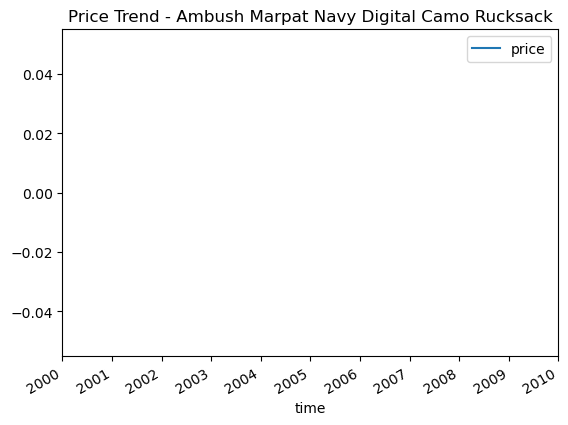

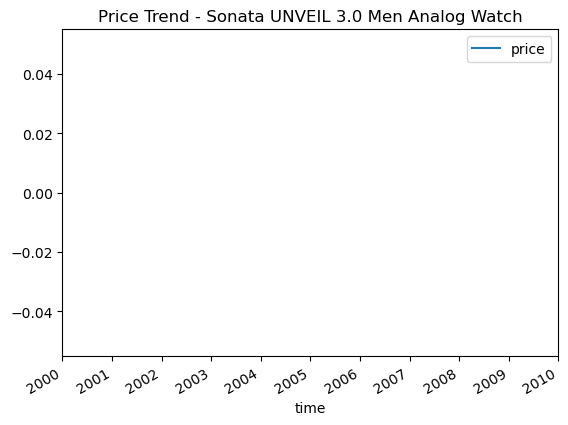

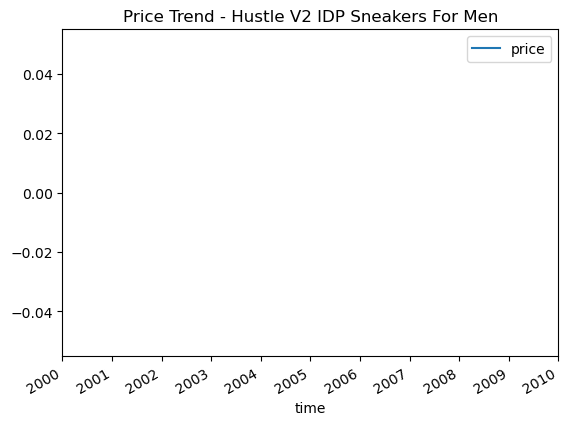

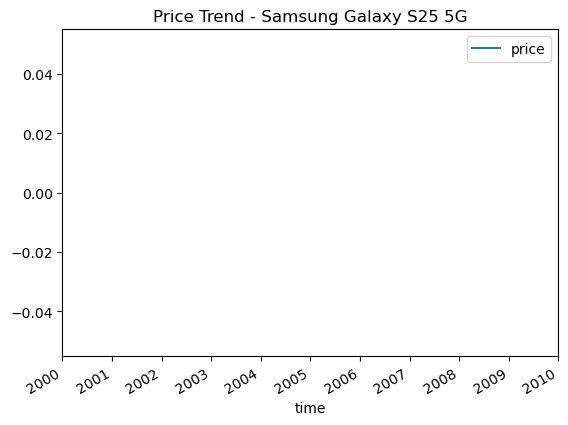

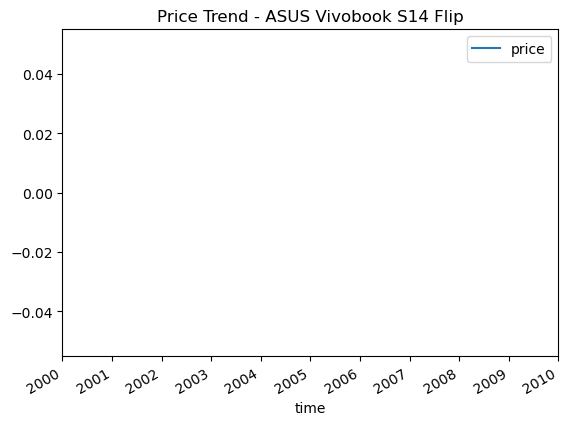

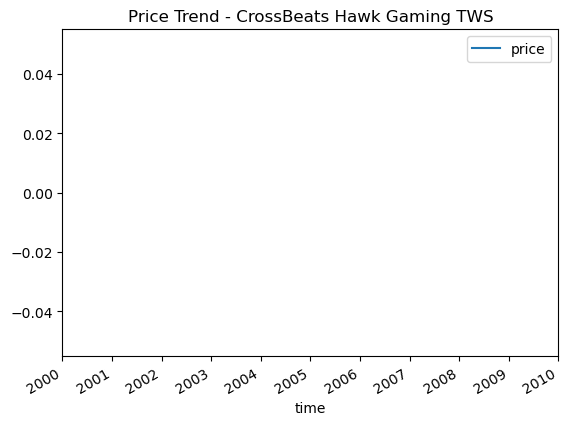

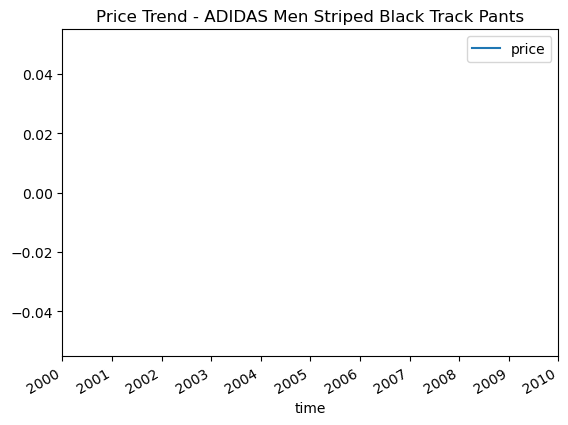

In [ ]:
# df= pd.read_csv('flipkart_price_tracker.csv', names=['time', 'product','url','price'])
# df['time']= pd.to_datetime(df['time'])

# #Clean the price and convert to integer
# df["price"] = df["price"].replace('[₹,]', '', regex=True).astype(float)
# #plot each product trend
# for product in df["product"].unique():
#     subset = df[df["product"] == product]
#     subset.plot(x="time", y="price", kind="line", title=f"Price Trend - {product}")

if __name__=="__main__":
    filename = "flipkart_price_tracker.csv"

    mannual_data = scrape_manual_products()
    cart_data = scrape_cart_products()
    scraped_data = mannual_data + cart_data

    save_data(filename, scraped_data)

    plot_price_trends(filename)

    print("Mannual + Cart products scraped, saved and plotted")

Email sending function

In [ ]:
# import smtplib
# from email.mime.text import MIMEText

# SENDER_EMAIL = 'jitulipun0722@gmail.com'
# RECEIVER_EMAIL = 'sahookunu162@gmail.com'
# APP_PASSWORD = 'epgqeishioqitfqr'  

# def send_email(subject, body, SENDER_EMAIL, RECEIVER_EMAIL, APP_PASSWORD):
#     msg = MIMEText(body, 'plain')
#     msg['From'] = SENDER_EMAIL
#     msg['To'] = RECEIVER_EMAIL
#     msg['Subject'] = subject

#     # Use SSL connection directly (no starttls!)
#     with smtplib.SMTP_SSL('smtp.gmail.com', 465) as server:
#         server.login(SENDER_EMAIL, APP_PASSWORD)
#         server.sendmail(SENDER_EMAIL, RECEIVER_EMAIL, msg.as_string())


# email_body = 'Price Update: \n\n'
# for row in data:
#     email_body += f'{row[1]} -> {row[2]} (Checked at {row[0]})\n'

# send_email('Daily Price Tracker Update', email_body, SENDER_EMAIL, RECEIVER_EMAIL, APP_PASSWORD)
# print('✅ Email sent successfully')
# print(email_body)


✅ Email sent successfully
Price Update: 

Ambush Marpat Navy Digital Camo Rucksack -> ₹1,749 (Checked at 2025-09-21 19:09:30.891657)
Sonata UNVEIL 3.0 Men Analog Watch -> ₹2,309 (Checked at 2025-09-21 19:09:31.641220)
Hustle V2 IDP Sneakers For Men -> ₹1,200 (Checked at 2025-09-21 19:09:35.457329)
Samsung Galaxy S25 5G -> ₹74,999 (Checked at 2025-09-21 19:09:51.160337)
ASUS Vivobook S14 Flip -> ₹57,990 (Checked at 2025-09-21 19:09:51.975170)
CrossBeats Hawk Gaming TWS -> ₹3,999 (Checked at 2025-09-21 19:09:52.874399)
ADIDAS Men Striped Black Track Pants -> ₹3,149 (Checked at 2025-09-21 19:09:53.608375)



In [47]:
# email_body = ' Price Update: \n\n'
# for row in data:
#     email_body+= f'{row[1]} -> {row[2]} (Checked at {row[0]})\n'


# send_email('Daily Price Tracker Update', email_body,SENDER_EMAIL, RECEIVER_EMAIL, APP_PASSWORD)
# print('Email sent successfully')
# print(email_body)
